In [1]:
import mlflow
from IPython.display import Image
from PIL import Image
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
mlflow.get_registry_uri()

In [3]:
def getRunMetricsAndArtifacts(experimentName: str, runName: str):
    
    experiment = mlflow.get_experiment_by_name(experimentName)
    experiment_id = experiment.experiment_id
    
    run = mlflow.search_runs(experiment_ids=[experiment_id], filter_string=f"tags.mlflow.runName = '{runName}'")
    runID = run.iloc[0]['run_id']
    run_info = mlflow.get_run(runID)
    
    path = mlflow.artifacts.download_artifacts(
        run_id=runID, artifact_path="Total_confusion_matrix.png"
    )

    metrics = run_info.data.metrics

    mean_precision_label_0 = metrics.get('MEAN_eval_precision_label_0')
    mean_precision_label_1 = metrics.get('MEAN_eval_precision_label_1')
    mean_recall_label_0 = metrics.get('MEAN_eval_recall_label_0')
    mean_recall_label_1 = metrics.get('MEAN_eval_recall_label_1')
    mean_f1_label_0 = metrics.get('MEAN_eval_f1_label_0')
    mean_f1_label_1 = metrics.get('MEAN_eval_f1_label_1')
    
    return path, mean_precision_label_0, mean_precision_label_1, mean_recall_label_0, mean_recall_label_1, mean_f1_label_0, mean_f1_label_1

## Performance Comparison of the Relevance Classifier with different datasets

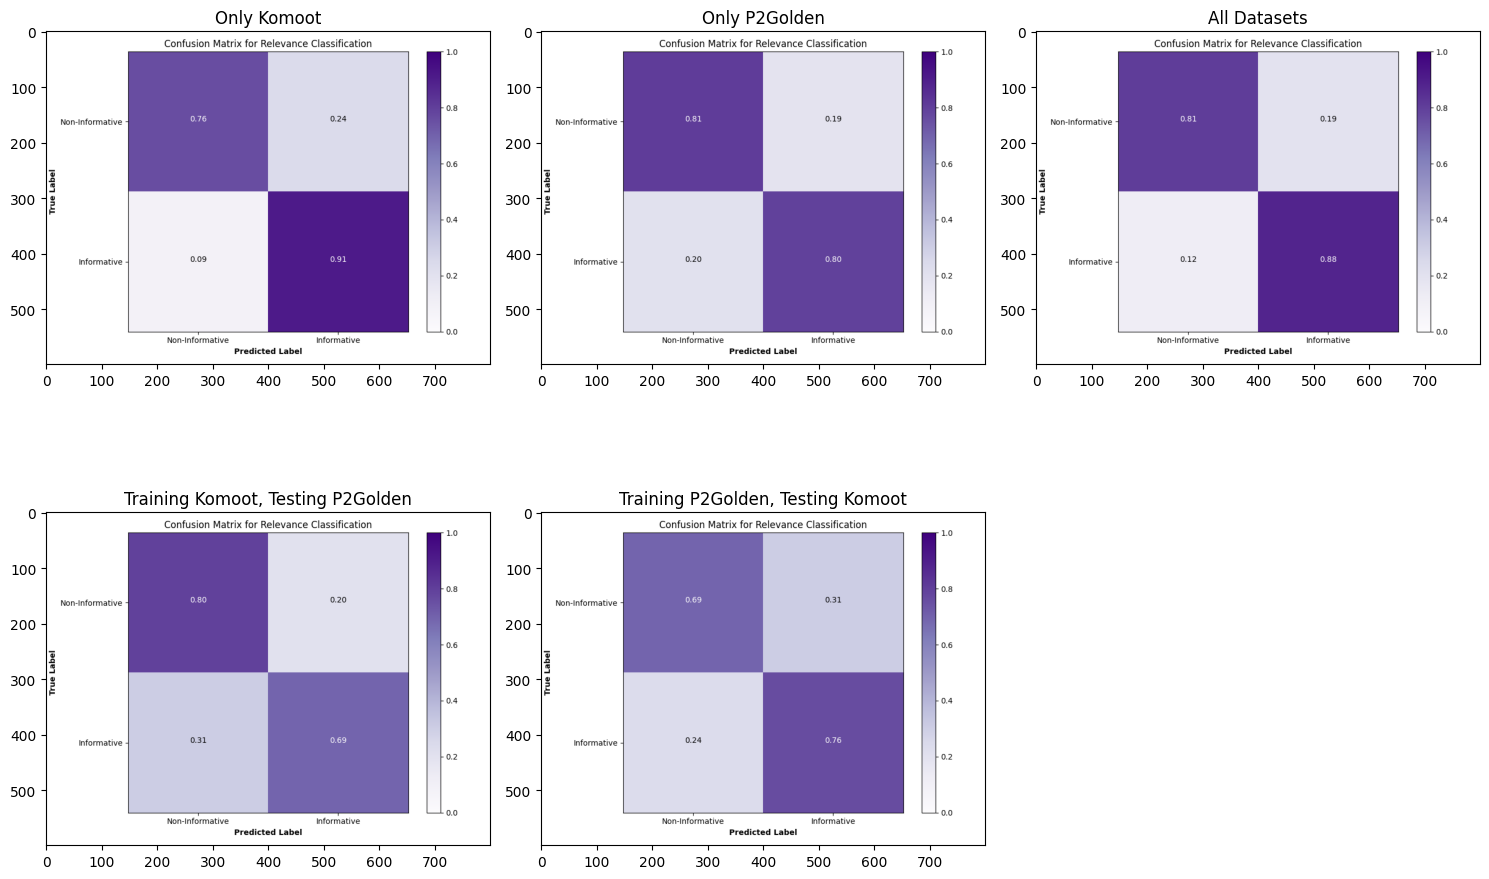

In [4]:
onlyKomootPath, onlyKomoot_mean_eval_precision_label_0, onlyKomoot_mean_eval_precision_label_1, onlyKomoot_mean_eval_recall_label_0, onlyKomoot_mean_eval_recall_label_1, onlyKomoot_mean_eval_f1_label_0, onlyKomoot_mean_eval_f1_label_1 = getRunMetricsAndArtifacts("RelevanceClassifier", "OnlyKomoot")
onlyP2GoldenPath, onlyP2Golden_mean_eval_precision_label_0, onlyP2Golden_mean_eval_precision_label_1, onlyP2Golden_mean_eval_recall_label_0, onlyP2Golden_mean_eval_recall_label_1, onlyP2Golden_mean_eval_f1_label_0, onlyP2Golden_mean_eval_f1_label_1 = getRunMetricsAndArtifacts("RelevanceClassifier", "OnlyP2Golden")
allDatasetsPath, allDatasets_mean_eval_precision_label_0, allDatasets_mean_eval_precision_label_1, allDatasets_mean_eval_recall_label_0, allDatasets_mean_eval_recall_label_1, allDatasets_mean_eval_f1_label_0, allDatasets_mean_eval_f1_label_1 = getRunMetricsAndArtifacts("RelevanceClassifier", "AllDatasets")
trainingKomootTestP2GoldenPath, trainingKomootTestP2Golden_mean_eval_precision_label_0, trainingKomootTestP2Golden_mean_eval_precision_label_1, trainingKomootTestP2Golden_mean_eval_recall_label_0, trainingKomootTestP2Golden_mean_eval_recall_label_1, trainingKomootTestP2Golden_mean_eval_f1_label_0, trainingKomootTestP2Golden_mean_eval_f1_label_1 = getRunMetricsAndArtifacts("RelevanceClassifier", "TrainingKomootTestP2Golden")
trainingP2GoldenTestKomootPath, trainingP2GoldenTestKomoot_mean_eval_precision_label_0, trainingP2GoldenTestKomoot_mean_eval_precision_label_1, trainingP2GoldenTestKomoot_mean_eval_recall_label_0, trainingP2GoldenTestKomoot_mean_eval_recall_label_1, trainingP2GoldenTestKomoot_mean_eval_f1_label_0, trainingP2GoldenTestKomoot_mean_eval_f1_label_1 = getRunMetricsAndArtifacts("RelevanceClassifier", "TrainingP2GoldenTestKomoot")

onlyKomoot_image = Image.open(onlyKomootPath)
onlyP2Golden_image = Image.open(onlyP2GoldenPath)
allDatasets_image = Image.open(allDatasetsPath)
trainingKomootTestP2Golden_image = Image.open(trainingKomootTestP2GoldenPath)
trainingP2GoldenTestKomoot_image = Image.open(trainingP2GoldenTestKomootPath)

plt.figure(figsize=(15, 10))

# Plot Only Komoot
plt.subplot(2, 3, 1)
plt.imshow(onlyKomoot_image)
plt.title("Only Komoot")

# Plot Only P2Golden
plt.subplot(2, 3, 2)
plt.imshow(onlyP2Golden_image)
plt.title("Only P2Golden")

# Plot all datasets
plt.subplot(2, 3, 3)
plt.imshow(allDatasets_image)
plt.title("All Datasets")

# Plot Training Komoot, Testing P2Golden
plt.subplot(2, 3, 4)
plt.imshow(trainingKomootTestP2Golden_image)
plt.title("Training Komoot, Testing P2Golden")

# Plot Training P2Golden, Testing Komoot
plt.subplot(2, 3, 5)
plt.imshow(trainingP2GoldenTestKomoot_image)
plt.title("Training P2Golden, Testing Komoot")

plt.tight_layout()
plt.show()

In [5]:
# Creating a table with the metrics
data = {
    'Dataset': ['Only Komoot', 'Only P2Golden', 'All Datasets', 'Training Komoot, Testing P2Golden', 'Training P2Golden, Testing Komoot'],
    'Precision Label 0': [onlyKomoot_mean_eval_precision_label_0, onlyP2Golden_mean_eval_precision_label_0, allDatasets_mean_eval_precision_label_0, trainingKomootTestP2Golden_mean_eval_precision_label_0, trainingP2GoldenTestKomoot_mean_eval_precision_label_0],
    'Precision Label 1': [onlyKomoot_mean_eval_precision_label_1, onlyP2Golden_mean_eval_precision_label_1, allDatasets_mean_eval_precision_label_1, trainingKomootTestP2Golden_mean_eval_precision_label_1, trainingP2GoldenTestKomoot_mean_eval_precision_label_1],
    'Recall Label 0': [onlyKomoot_mean_eval_recall_label_0, onlyP2Golden_mean_eval_recall_label_0, allDatasets_mean_eval_recall_label_0, trainingKomootTestP2Golden_mean_eval_recall_label_0, trainingP2GoldenTestKomoot_mean_eval_recall_label_0],
    'Recall Label 1': [onlyKomoot_mean_eval_recall_label_1, onlyP2Golden_mean_eval_recall_label_1, allDatasets_mean_eval_recall_label_1, trainingKomootTestP2Golden_mean_eval_recall_label_1, trainingP2GoldenTestKomoot_mean_eval_recall_label_1],
    'F1 Label 0': [onlyKomoot_mean_eval_f1_label_0, onlyP2Golden_mean_eval_f1_label_0, allDatasets_mean_eval_f1_label_0, trainingKomootTestP2Golden_mean_eval_f1_label_0, trainingP2GoldenTestKomoot_mean_eval_f1_label_0],
    'F1 Label 1': [onlyKomoot_mean_eval_f1_label_1, onlyP2Golden_mean_eval_f1_label_1, allDatasets_mean_eval_f1_label_1, trainingKomootTestP2Golden_mean_eval_f1_label_1, trainingP2GoldenTestKomoot_mean_eval_f1_label_1]
}

df = pd.DataFrame(data)
df

,Dataset,Precision Label 0,Precision Label 1,Recall Label 0,Recall Label 1,F1 Label 0,F1 Label 1
0,Only Komoot,0.767192,0.907102,0.758333,0.911119,0.762410,0.909049
1,Only P2Golden,0.828064,0.776964,0.809625,0.796778,0.818025,0.785787
2,All Datasets,0.806746,0.885197,0.807415,0.881648,0.804894,0.882472
3,"Training Komoot, Testing P2Golden",0.761879,0.740460,0.797273,0.695818,0.777382,0.714531
4,"Training P2Golden, Testing Komoot",0.549684,0.867742,0.695173,0.764747,0.606459,0.808403
